<a href="https://colab.research.google.com/github/Pimwipha302004/Pimwipha302004-Pimwipha-229352-StatisticalLeaening-2/blob/main/lab05_decision_tree_bagging_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [1]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [7]:
import pandas as pd

url = "https://donlapark.pages.dev/229352/heart_disease.csv"
data = pd.read_csv(url, na_values="?")

data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [8]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [9]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [10]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

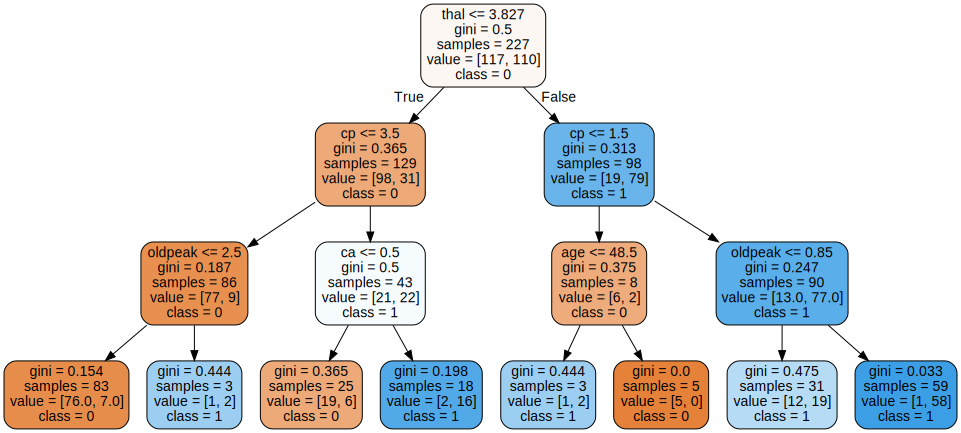

In [11]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [12]:
# Result
from sklearn.metrics import classification_report

ypred =gridcv.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73        47
           1       0.59      0.83      0.69        29

    accuracy                           0.71        76
   macro avg       0.72      0.73      0.71        76
weighted avg       0.75      0.71      0.71        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [13]:
#สุ่มข้อมูลใหม่หลายครั้ง
clf = DecisionTreeClassifier()
bagged_tree = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5)
bagged_tree.fit(X_train, y_train)

ypred_bt = bagged_tree.predict(X_test)
print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        47
           1       0.69      0.83      0.75        29

    accuracy                           0.79        76
   macro avg       0.78      0.80      0.78        76
weighted avg       0.80      0.79      0.79        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [14]:
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

ypred_rf = rf.predict(X_test)
print(classification_report(y_test, ypred_rf))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76        47
           1       0.61      0.76      0.68        29

    accuracy                           0.72        76
   macro avg       0.72      0.73      0.72        76
weighted avg       0.74      0.72      0.73        76



#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [18]:
pipe_dt = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("dt", DecisionTreeClassifier(random_state=42))
])

param_dt = {
    "dt__criterion": ["gini", "entropy"],
    "dt__max_depth": [None, 4, 6, 8],
    "dt__ccp_alpha": [0.0, 0.005, 0.01]
}

grid_dt = GridSearchCV(
    pipe_dt,
    param_dt,
    cv=5,
    scoring="f1_macro"
)

grid_dt.fit(X_train, y_train)

y_pred_dt = grid_dt.predict(X_test)


In [19]:
pipe_bt = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("bt", BaggingClassifier(
        estimator=DecisionTreeClassifier(random_state=42),
        random_state=42
    ))
])

param_bt = {
    "bt__n_estimators": [30, 60, 120],
    "bt__estimator__max_depth": [3, 5, None],
    "bt__estimator__min_samples_leaf": [1, 3, 5]
}

grid_bt = GridSearchCV(
    pipe_bt,
    param_bt,
    cv=5,
    scoring="f1_macro"
)

grid_bt.fit(X_train, y_train)

y_pred_bt = grid_bt.predict(X_test)


In [20]:
pipe_rf = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("rf", RandomForestClassifier(random_state=42))
])

param_rf = {
    "rf__n_estimators": [150, 300],
    "rf__max_features": ["sqrt", 0.5],
    "rf__bootstrap": [True, False]
}

grid_rf = GridSearchCV(
    pipe_rf,
    param_rf,
    cv=5,
    scoring="f1_macro"
)

grid_rf.fit(X_train, y_train)

y_pred_rf = grid_rf.predict(X_test)


In [21]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate(name, y_true, y_pred):
    print(name)
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("F1-macro:", f1_score(y_true, y_pred, average="macro"))
    print("-" * 40)

evaluate("Decision Tree", y_test, y_pred_dt)
evaluate("Bagged Trees", y_test, y_pred_bt)
evaluate("Random Forest", y_test, y_pred_rf)


Decision Tree
Accuracy: 0.75
F1-macro: 0.7398666906863628
----------------------------------------
Bagged Trees
Accuracy: 0.7236842105263158
F1-macro: 0.7177718832891247
----------------------------------------
Random Forest
Accuracy: 0.7894736842105263
F1-macro: 0.782078853046595
----------------------------------------


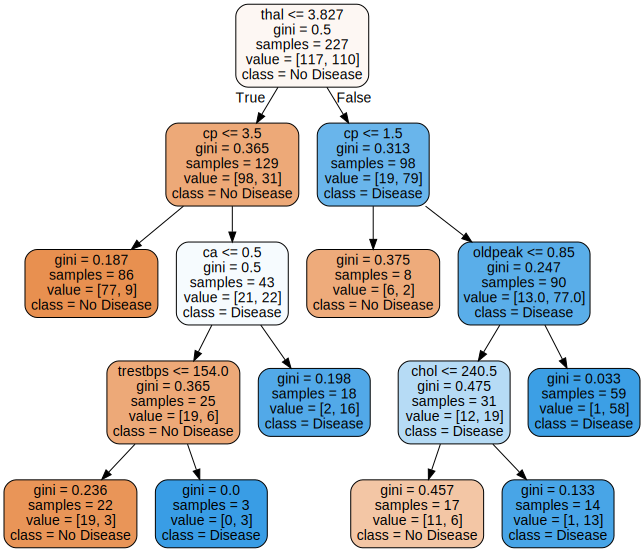

In [22]:
from sklearn.tree import export_graphviz
import graphviz

best_tree = grid_dt.best_estimator_.named_steps["dt"]

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)

graphviz.Source(dot_data)
